<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACD**

Moving average convergence divergence (MACD) shows the relationship between two moving averages of a share's price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. We buy the share when the MACD crosses above its signal line and sell the share when the MACD crosses below the signal line. Moving average convergence divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the dta
from google.colab import files
uploaded=files.upload()

Saving WIPRO-2017.csv to WIPRO-2017.csv


In [ ]:
#store the data into a df
df = pd.read_csv('WIPRO-2017.csv')
#set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2017-01-02,2017-01-02,475.05,478.4,470.50,471.10,471.55,461428.0,2189.63
2017-01-03,2017-01-03,473.00,474.1,465.70,467.75,467.00,691301.0,3244.45
2017-01-04,2017-01-04,467.00,477.6,466.10,477.05,475.60,1134495.0,5366.42
2017-01-05,2017-01-05,477.10,485.9,477.10,480.55,480.40,978187.0,4715.90
2017-01-06,2017-01-06,478.50,480.1,469.00,469.60,469.95,1571573.0,7417.73
...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22,298.00,303.4,296.05,301.50,301.60,1758584.0,5281.33
2017-12-26,2017-12-26,301.25,307.0,298.15,304.00,302.90,1855536.0,5601.42
2017-12-27,2017-12-27,303.90,308.0,300.05,306.60,306.60,1815733.0,5522.55
2017-12-28,2017-12-28,305.90,309.9,302.50,305.90,308.00,5047272.0,15475.48


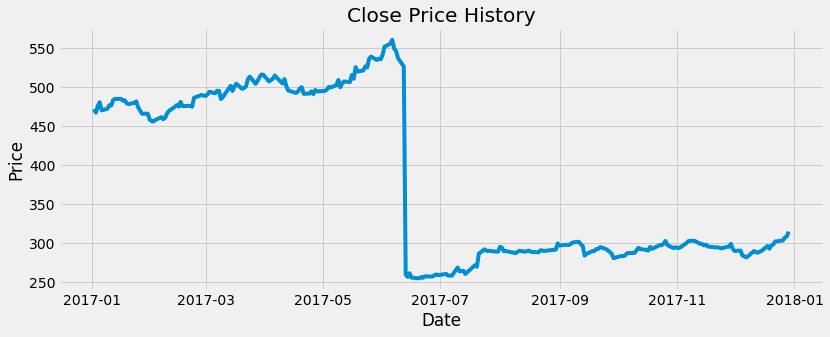

In [ ]:
#Visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
#Calculate the MACD and Signal Line indicators
#calculate the short term exponential moving average (EMA)
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#Calculate the long term exponential moving average(EMA)
LongEMA = df.Close.ewm(span=26,adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9,adjust=False).mean()

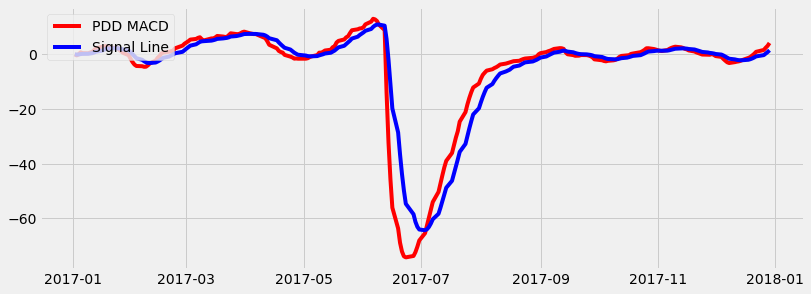

In [ ]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,MACD,label='PDD MACD',color='red')
plt.plot(df.index,signal,label='Signal Line',color = 'blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the data
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MACD,Signal Line
2017-01-02,2017-01-02,475.05,478.4,470.50,471.10,471.55,461428.0,2189.63,0.000000,0.000000
2017-01-03,2017-01-03,473.00,474.1,465.70,467.75,467.00,691301.0,3244.45,-0.362963,-0.072593
2017-01-04,2017-01-04,467.00,477.6,466.10,477.05,475.60,1134495.0,5366.42,0.042841,-0.049506
2017-01-05,2017-01-05,477.10,485.9,477.10,480.55,480.40,978187.0,4715.90,0.743196,0.109034
2017-01-06,2017-01-06,478.50,480.1,469.00,469.60,469.95,1571573.0,7417.73,0.449819,0.177191
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22,298.00,303.4,296.05,301.50,301.60,1758584.0,5281.33,0.930606,-0.741529
2017-12-26,2017-12-26,301.25,307.0,298.15,304.00,302.90,1855536.0,5601.42,1.610994,-0.271024
2017-12-27,2017-12-27,303.90,308.0,300.05,306.60,306.60,1815733.0,5522.55,2.420860,0.267353
2017-12-28,2017-12-28,305.90,309.9,302.50,305.90,308.00,5047272.0,15475.48,3.139463,0.841775


In [ ]:
#Create a function to signal when to buy adn sell and asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan) 
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
    
  return (Buy,Sell)

In [ ]:
#Create Buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


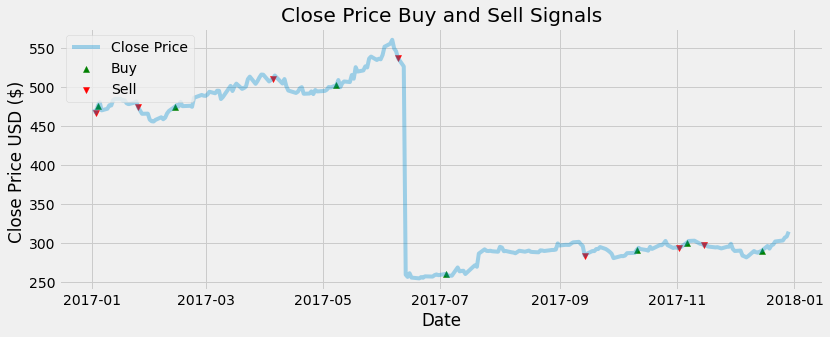

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($) ')
plt.legend(loc='upper left')
plt.show()
